*Markdown area*

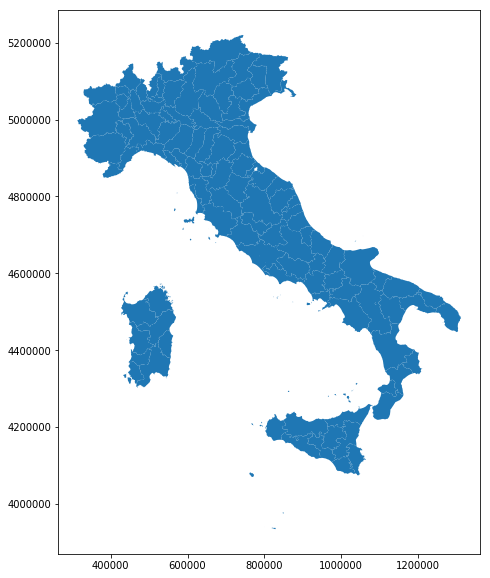

In [2]:
%matplotlib inline
import geopandas as geo;
data = geo.read_file('resouces/CMprov2016_WGS84_g.shp')
type(data)
data.plot(figsize=(10, 10))

In [3]:
data

,COD_REG,COD_CM,COD_PRO,DEN_CMPRO,PROVINCIA,SIGLA,FLAG_CMPRO,SHAPE_Leng,SHAPE_Area,geometry
0,1,0,2,Vercelli,Vercelli,VC,2,418133.405900,2.082312e+09,"POLYGON ((438328.6113 5087208.2139, 439028.887..."
1,1,0,3,Novara,Novara,NO,2,250242.386669,1.341320e+09,"POLYGON ((460929.5409000004 5076320.297, 46116..."
2,1,201,1,Torino,-,TO,1,539532.779877,6.828201e+09,"POLYGON ((411015.0049999999 5049970.9825, 4112..."
3,1,0,4,Cuneo,Cuneo,CN,2,490394.849316,6.898380e+09,(POLYGON ((420223.8624999998 4963873.631200001...
4,1,0,6,Alessandria,Alessandria,AL,2,474880.850716,3.560305e+09,"POLYGON ((453307.9177999999 5005504.3221, 4542..."
5,2,0,7,Aosta,Aosta,AO,2,311139.260923,3.258907e+09,"POLYGON ((390652.6434000004 5091766.170499999,..."
6,1,0,5,Asti,Asti,AT,2,315561.373435,1.508948e+09,"POLYGON ((425041.3282000003 4997628.3084, 4249..."
7,7,210,10,Genova,-,GE,1,361441.570315,1.833367e+09,"(POLYGON ((486561.1190999998 4918698.4168, 486..."
8,7,0,11,La Spezia,La Spezia,SP,2,212519.316426,8.812572e+08,(POLYGON ((566523.4551999997 4884000.000299999...
9,3,0,12,Varese,Varese,VA,2,245995.745977,1.199479e+09,"POLYGON ((483071.5653999997 5104606.0912, 4832..."


In [7]:
import pandas as pd
ser = pd.Series(data["COD_REG"], dtype="category")
ser.describe()

count     110
unique     20
top         3
freq       12
Name: COD_REG, dtype: int64

In [35]:
import pandas as pd
prov = pd.DataFrame(data[['COD_PRO', 'SIGLA', 'COD_REG',  'DEN_CMPRO', 'COD_CM', 'PROVINCIA']])
#prov['IS_CAPOLUOGO'] = pd.Series(prov['PROVINCIA'].apply(lambda x : True if x == "-"  else False))
del prov['PROVINCIA']
prov['IS_CM'] = pd.Series(prov['COD_CM'].apply(lambda x : True if x != 0  else False))
prov.columns = ['CodiceIstat', 'Sigla', 'CodiceIstatRegione', 'Nome', 'CodiceIstatCM', 'CM']

capoluoghi =['Milano', 'Roma', 'Napoli', 'Palermo', 'Venezia', 'Bologna', 'Torino', 'Bari', 'Firenze', 'Catanzaro', 'Cagliari', 'Genova', 'Ancona', "'L'Aquila", 'Trieste', 'Trento', 'Perugia', 'Potenza', 'Campobasso', 'Aosta']
prov['Capoluogo'] = pd.Series(prov['Nome'].apply(lambda x : x in capoluoghi))

prov.to_csv("./out/Province.csv", sep=';', index=False)